In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
from itertools import chain

In [2]:
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['figure.figsize'] = (12,7)

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [3]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
# sample_df = pd.read_csv('sample_labels.csv')
# sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
29615,00007711_000.png,No Finding,0,7711,24,F,PA,2500,2048,0.168,0.168,NaN
43698,00011251_019.png,Infiltration,19,11251,76,M,AP,2500,2048,0.168,0.168,NaN
26959,00007034_036.png,Effusion|Infiltration|Nodule|Pleural_Thickening,36,7034,30,F,AP,3056,2544,0.139,0.139,NaN


In [4]:
## EDA
# Todo 
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [5]:
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3586,00017691_021.png,Infiltration,21,17691,061Y,M,PA,2754,2681,0.143,0.143
5323,00028684_003.png,No Finding,3,28684,022Y,F,AP,3056,2544,0.139,0.139
5078,00026977_000.png,No Finding,0,26977,056Y,M,PA,2992,2991,0.143,0.143


In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  5606 non-null   object 
 1   Finding Labels               5606 non-null   object 
 2   Follow-up #                  5606 non-null   int64  
 3   Patient ID                   5606 non-null   int64  
 4   Patient Age                  5606 non-null   object 
 5   Patient Gender               5606 non-null   object 
 6   View Position                5606 non-null   object 
 7   OriginalImageWidth           5606 non-null   int64  
 8   OriginalImageHeight          5606 non-null   int64  
 9   OriginalImagePixelSpacing_x  5606 non-null   float64
 10  OriginalImagePixelSpacing_y  5606 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 481.9+ KB


## Analysis 

* <b>Age</b>

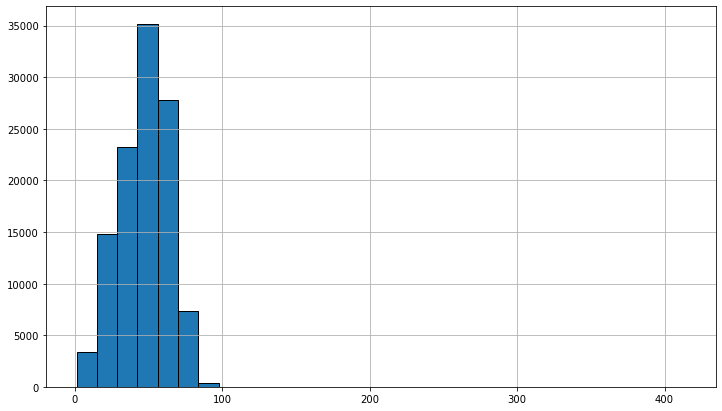

In [7]:
h = all_xray_df['Patient Age'].hist(bins=30)

In [8]:
over100 = all_xray_df[all_xray_df['Patient Age']>100]
print(len(over100))
over100

16


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,0.143,NaN
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,0.143,NaN
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,0.143,NaN
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,0.143,NaN
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,0.143,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN


As we can see that we have 16 records where Patient Age is over 140 which might be a recording error. So, we can set those ages within feasible age range. Let's set them to be 100.

In [9]:
all_xray_df['Patient Age'] = all_xray_df['Patient Age'].apply(lambda x : 101 if x>100 else x)

In [10]:
over100 = all_xray_df[all_xray_df["Patient Age"]>100]
print(len(over100))
over100

16


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
20852,00005567_000.png,Effusion|Pneumonia,0,5567,101,M,AP,3056,2544,0.139,0.139,NaN
46965,00011973_002.png,Edema,2,11973,101,M,AP,3056,2544,0.139,0.139,NaN
48284,00012238_010.png,No Finding,10,12238,101,M,PA,2992,2991,0.143,0.143,NaN
55742,00013950_000.png,No Finding,0,13950,101,M,PA,2964,2939,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,101,M,PA,2992,2991,0.143,0.143,NaN
62929,00015558_000.png,No Finding,0,15558,101,M,PA,2992,2991,0.143,0.143,NaN
74884,00018366_044.png,Pneumothorax,44,18366,101,F,PA,2302,2991,0.143,0.143,NaN
78795,00019346_000.png,Infiltration,0,19346,101,F,PA,2678,2774,0.143,0.143,NaN
84810,00020900_002.png,No Finding,2,20900,101,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,101,M,AP,3056,2544,0.139,0.139,NaN


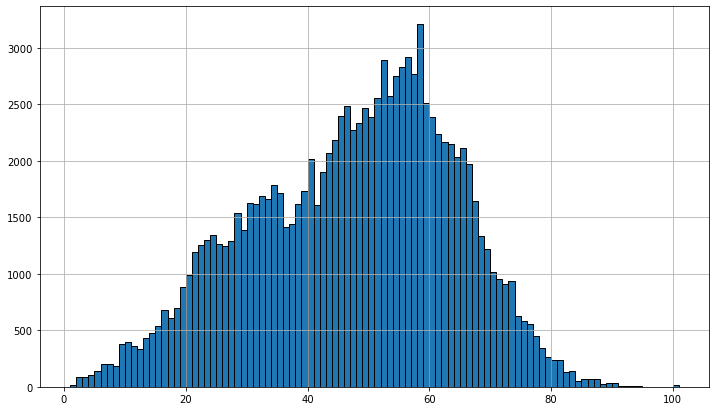

In [11]:
# Check the Age distribution now ----
all_xray_df['Patient Age'].hist(bins=100)

Age distribution is roughly somewhat right skewed with peak around 58.

In [12]:
all_xray_df[all_xray_df['Patient Age'] <= 100]['Patient Age'].describe()

count    112104.000000
mean         46.872574
std          16.598152
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64

<b>So, patient's age range from 1 to 95</b>

* <b>Gender</b>

In [13]:
gen_m = all_xray_df[all_xray_df['Patient Gender'] == 'M']
gen_f = all_xray_df[all_xray_df['Patient Gender'] == 'F']

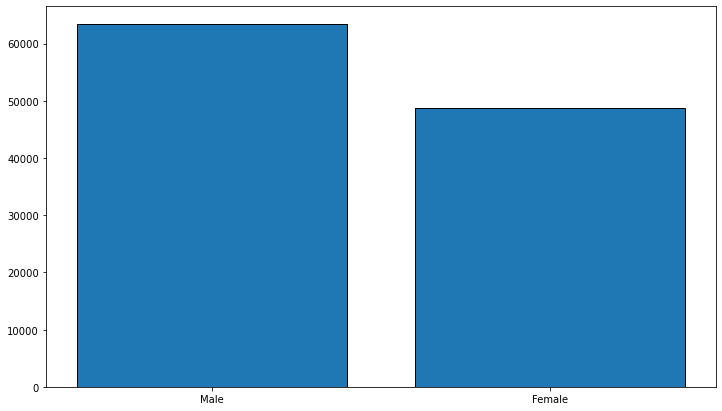

In [14]:
plt.bar(['Male','Female'],(len(gen_m),len(gen_f)));

In [15]:
print(f'Patient Gender Distribution-- \nMale: {len(gen_m)} ({100.0*len(gen_m)/len(all_xray_df):.2f}%), Female: {len(gen_f)} ({100.0*len(gen_f)/len(all_xray_df):.2f}%)')

Patient Gender Distribution-- 
Male: 63340 (56.49%), Female: 48780 (43.51%)


* <b>View Position</b>

In [16]:
all_xray_df['View Position'].unique()

array(['PA', 'AP'], dtype=object)

<BarContainer object of 2 artists>

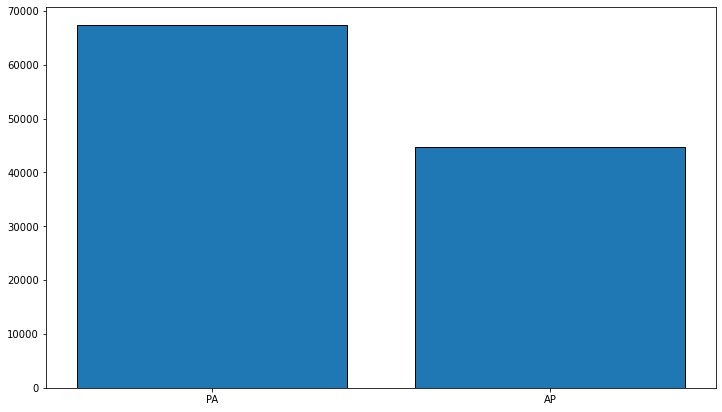

In [17]:
pos_pa = all_xray_df[all_xray_df["View Position"] == 'PA']
pos_ap = all_xray_df[all_xray_df['View Position'] == 'AP']
plt.bar(['PA','AP'],[len(pos_pa),len(pos_ap)])

In [18]:
print(f'View Position Distribution-- \nPA: {len(pos_pa)} ({100.0*len(pos_pa)/len(all_xray_df):.2f}%), AP: {len(pos_ap)} ({100.0*len(pos_ap)/len(all_xray_df):.2f}%)')

View Position Distribution-- 
PA: 67310 (60.03%), AP: 44810 (39.97%)


* <b>Follow-up Number</b>

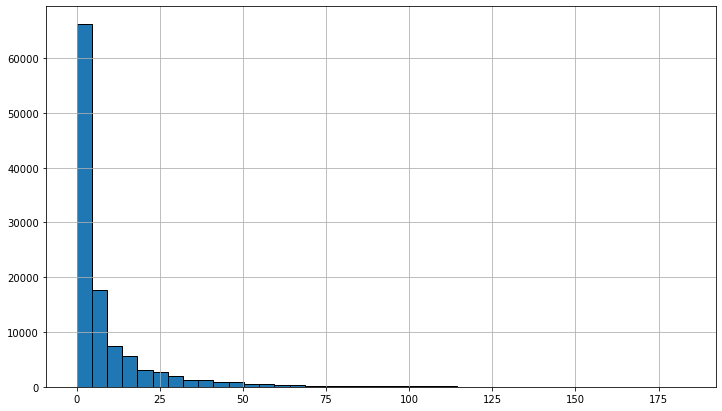

In [19]:
all_xray_df['Follow-up #'].hist(bins=40);

In [20]:
all_xray_df['Follow-up #'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [21]:
follow_up_0 = all_xray_df[all_xray_df['Follow-up #']==0]
print(f'Follow-up number 0 (first visit): {len(follow_up_0)} ({100.0*len(follow_up_0)/len(all_xray_df) :.2f}%)')

follow_up_1 = all_xray_df[all_xray_df['Follow-up #']==1]
print(f'Follow-up number 1 (second visit): {len(follow_up_1)} ({100.0*len(follow_up_1)/len(all_xray_df) :.2f}%)')

follow_up_2 = all_xray_df[all_xray_df['Follow-up #']==2]
print(f'Follow-up number 2 (third visit): {len(follow_up_2)} ({100.0*len(follow_up_2)/len(all_xray_df) :.2f}%)')

follow_up_3 = all_xray_df[all_xray_df['Follow-up #']==3]
print(f'Follow-up number 3 (fourth visit): {len(follow_up_3)} ({100.0*len(follow_up_3)/len(all_xray_df) :.2f}%)')

follow_up_4 = all_xray_df[all_xray_df['Follow-up #']==4]
print(f'Follow-up number 4 (fifth visit): {len(follow_up_4)} ({100.0*len(follow_up_4)/len(all_xray_df) :.2f}%)')

Follow-up number 0 (first visit): 30805 (27.48%)
Follow-up number 1 (second visit): 13302 (11.86%)
Follow-up number 2 (third visit): 9189 (8.20%)
Follow-up number 3 (fourth visit): 7089 (6.32%)
Follow-up number 4 (fifth visit): 5759 (5.14%)


* <b>Labels</b>

In [22]:
all_xray_df['Finding Labels'].nunique()

836

In [23]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x:x.split('|')).tolist())))
print(len(all_labels))
set(all_labels)

15


{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [24]:
no_find = all_xray_df[all_xray_df['Finding Labels']=='No Finding']
print(f'No finding: {len(no_find)} ({100.0*len(no_find)/len(all_xray_df) :.2f}%)')

No finding: 60361 (53.84%)


* <b>Patient Id</b>

In [25]:
uniq_id = all_xray_df['Patient ID'].nunique()
print(f'Total Number of Unique patients: {uniq_id},\nAverage records per patient: {len(all_xray_df)/uniq_id:.2f}')

Total Number of Unique patients: 30805,
Average records per patient: 3.64


In [26]:
rec_per_patient = {}
for pid in all_xray_df['Patient ID'].unique():
    rec_per_patient[pid] = len(all_xray_df[all_xray_df['Patient ID']==pid])

In [27]:
#plt.hist(rec_per_patient.values(),bins=max(rec_per_patient.keys()));

In [28]:
def num_pat_rec(num):
    count = 0
    for i in rec_per_patient.keys():
        if rec_per_patient[i]==num:
            count+=1
    return count

In [29]:
for i in range(1,11):
    print(f'Number of Patients with {i} records in dataset: {num_pat_rec(i)} ({100*num_pat_rec(i)/uniq_id:.2f}%)')

Number of Patients with 1 records in dataset: 17503 (56.82%)
Number of Patients with 2 records in dataset: 4113 (13.35%)
Number of Patients with 3 records in dataset: 2100 (6.82%)
Number of Patients with 4 records in dataset: 1330 (4.32%)
Number of Patients with 5 records in dataset: 938 (3.04%)
Number of Patients with 6 records in dataset: 787 (2.55%)
Number of Patients with 7 records in dataset: 608 (1.97%)
Number of Patients with 8 records in dataset: 494 (1.60%)
Number of Patients with 9 records in dataset: 387 (1.26%)
Number of Patients with 10 records in dataset: 320 (1.04%)


* <b>Image width and height pixel spacing</b>

In [30]:
des = all_xray_df.describe()
des

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.880298,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.609556,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,101.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [31]:
def show_max_min(col,name):
    print(f"{name} range: [{des[col]['min']}, {des[col]['max']}]")

In [32]:
show_max_min('OriginalImage[Width','Image Width')
show_max_min('Height]','Image Height')
print('\n')
show_max_min('OriginalImagePixelSpacing[x','Pixel Spacing over X')
show_max_min('y]','Pixel Spacing over Y')

Image Width range: [1143.0, 3827.0]
Image Height range: [966.0, 4715.0]


Pixel Spacing over X range: [0.115, 0.1988]
Pixel Spacing over Y range: [0.115, 0.1988]


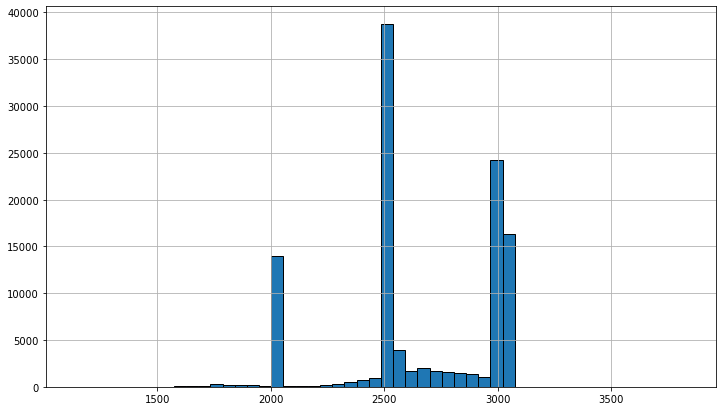

In [33]:
all_xray_df['OriginalImage[Width'].hist(bins=50)

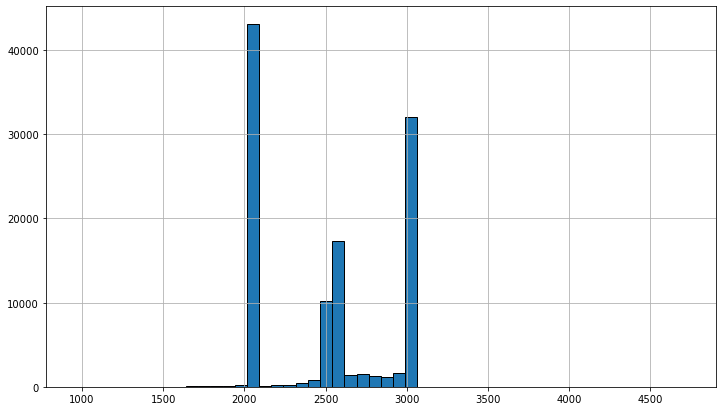

In [34]:
all_xray_df['Height]'].hist(bins=50)

In [35]:
# As we can most images have height of 2500....
width2500 = all_xray_df[all_xray_df['OriginalImage[Width']==2500]
width2500

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104746,00028066_002.png,Atelectasis|Effusion|Infiltration,2,28066,24,M,PA,2500,2746,0.143,0.143,NaN
107219,00028928_000.png,No Finding,0,28928,73,F,PA,2500,3016,0.139,0.139,NaN
107276,00028948_005.png,Hernia,5,28948,87,F,PA,2500,3056,0.139,0.139,NaN
112111,00030798_000.png,No Finding,0,30798,30,M,PA,2500,2048,0.171,0.171,NaN


In [36]:
print(f'Images with width 2500: {len(width2500)} ({100*len(width2500)/len(all_xray_df):.2f}%)')

Images with width 2500: 37191 (33.17%)


In [37]:
# As most of images with width 2500 have height of 2048 ...
height2048 = all_xray_df[all_xray_df['Height]']==2048]
height2048

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95095,00024812_000.png,No Finding,0,24812,39,M,PA,2500,2048,0.168,0.168,NaN
95106,00024823_000.png,No Finding,0,24823,27,M,PA,2500,2048,0.168,0.168,NaN
95349,00025060_000.png,No Finding,0,25060,35,M,PA,2500,2048,0.168,0.168,NaN
112111,00030798_000.png,No Finding,0,30798,30,M,PA,2500,2048,0.171,0.171,NaN


In [38]:
print(f'Images with Height 2048: {len(height2048)} ({100*len(height2048)/len(all_xray_df):.2f}%)')

Images with Height 2048: 37155 (33.14%)


In [39]:
# Lets see how many images have width and height od 2500 x 2048 ... 
size_2500_2048 = all_xray_df[(all_xray_df['OriginalImage[Width']==2500) & (all_xray_df['Height]']==2048)]
print(f'Images 2500x2048 : {len(size_2500_2048)} ({100*len(size_2500_2048)/len(all_xray_df):.2f}%)')

Images 2500x2048 : 37153 (33.14%)


As we can see that almost 1/3 of images have the above size.

## Pneumonia Cases - 
* <b>Map all findings - </b>

In [40]:
len(all_labels)

15

In [41]:
print('All labels ({}): {}'.format(len(all_labels),all_labels))

All labels (15): ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


In [42]:
for c_label in all_labels:
    if len(c_label)>1:
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda x: 1.0 if c_label in x else 0)

In [43]:
all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
pneumonia = all_xray_df[all_xray_df['Pneumonia']==1]
pneumonia

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111557,00030536_007.png,Atelectasis|Consolidation|Pneumonia,7,30536,56,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111627,00030570_001.png,Edema|Infiltration|Pneumonia,1,30570,29,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
111767,00030621_002.png,Pneumonia,2,30621,22,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111845,00030637_016.png,Consolidation|Pneumonia,16,30637,48,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
all_findings = all_xray_df[all_xray_df['No Finding']==0]
print(f'All Finding : {len(all_findings)} ({100*len(all_findings)/len(all_xray_df):.2f}%)')

All Finding : 51759 (46.16%)


In [46]:
print(f'Pneumonia Images - {len(pneumonia)} of which are:\n{100*len(pneumonia)/len(all_xray_df):.2f}% of all in dataset and {100*len(pneumonia)/len(all_findings):.2f}% where there was finding. ')

Pneumonia Images - 1431 of which are:
1.28% of all in dataset and 2.76% where there was finding. 


In [47]:
no_pneumonia = all_xray_df[all_xray_df["Pneumonia"] == 0]
print(f'No pneumonia: {len(no_pneumonia)}')

No pneumonia: 110689


In [48]:
no_pneumonia_findings = all_xray_df[ (all_xray_df["Pneumonia"] == 0) & (all_xray_df["No Finding"] == 0) ]
print(f'No pneumonia among findings: {len(no_pneumonia_findings)}')

No pneumonia among findings: 50328


### Feature Distribution among Pneumonia Cases - 

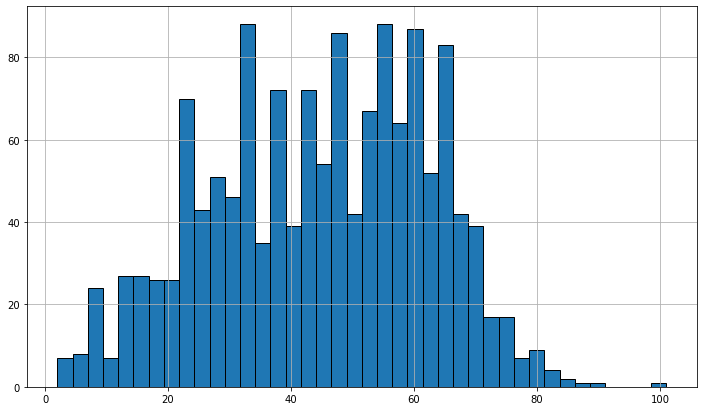

In [49]:
pneumonia['Patient Age'].hist(bins=40);

In [50]:
pneumonia[pneumonia['Patient Age']<=100].describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Atelectasis,Cardiomegaly,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,0.0,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.0,1430.000000,1430.000000,1430.0,1430.000000
mean,14.439161,14389.927273,44.670629,2668.407692,2442.060839,0.155042,0.155042,NaN,0.183217,0.028671,...,0.016084,0.007692,0.002098,0.423077,0.049650,0.0,0.048951,0.033566,1.0,0.028671
std,20.078227,7976.454258,17.639098,329.090274,388.530801,0.015190,0.015190,NaN,0.386979,0.166939,...,0.125842,0.087398,0.045771,0.494220,0.217298,0.0,0.215841,0.180173,0.0,0.166939
min,0.000000,13.000000,2.000000,1581.000000,1537.000000,0.115000,0.115000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
25%,2.000000,8230.000000,31.000000,2500.000000,2048.000000,0.143000,0.143000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
50%,7.000000,14254.500000,46.000000,2500.000000,2500.000000,0.143000,0.143000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
75%,18.000000,19920.000000,59.000000,2992.000000,2846.500000,0.168000,0.168000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
max,155.000000,30801.000000,90.000000,3056.000000,3056.000000,0.194314,0.194314,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.000000


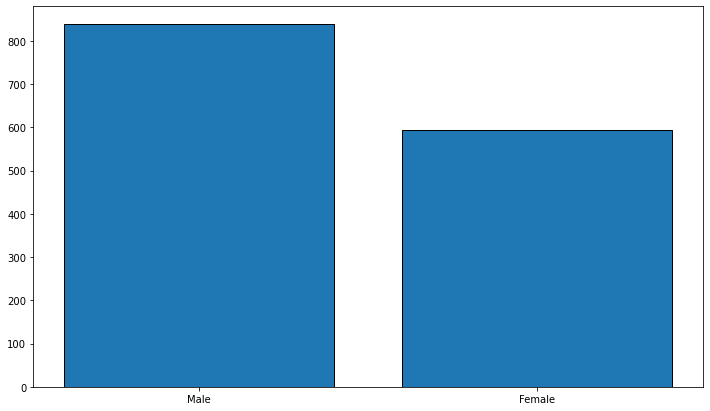

In [51]:
plt.bar(['Male','Female'],[len(pneumonia[pneumonia['Patient Gender']=='M']),len(pneumonia[pneumonia['Patient Gender']=='F'])]);

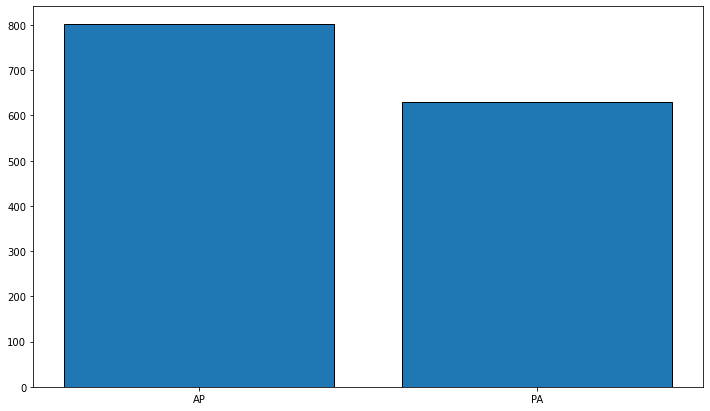

In [52]:
plt.bar(['AP','PA'],[len(pneumonia[pneumonia['View Position']=='AP']),len(pneumonia[pneumonia['View Position']=='PA'])]);

In [53]:
pneumonia_unique_patients_num = pneumonia['Patient ID'].nunique()
print(f'Total pneumonia patients: {pneumonia_unique_patients_num}, average number records per patient: {len(pneumonia)/pneumonia_unique_patients_num :.2f}')

Total pneumonia patients: 1008, average number records per patient: 1.42


In [54]:
pneumonia_records_per_patient = []
for pid in pneumonia['Patient ID'].unique():
    pneumonia_records_per_patient.append(len(pneumonia[pneumonia['Patient ID'] == pid]))

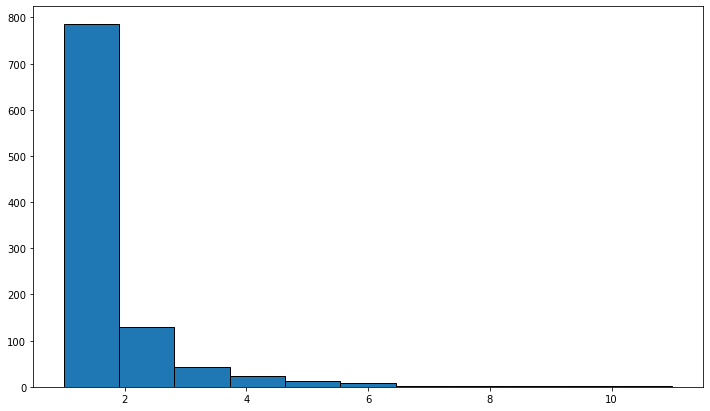

In [55]:
plt.hist(pneumonia_records_per_patient, bins=max(pneumonia_records_per_patient))
plt.show();

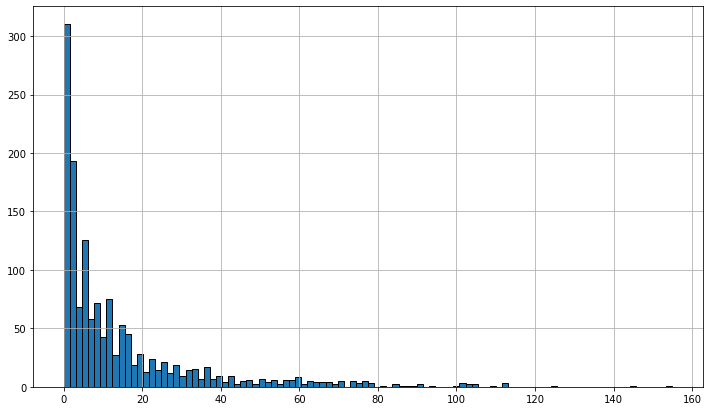

In [56]:
pneumonia['Follow-up #'].hist(bins=100);

Features mostly retained the same distribution among the pneumonia records as in the original dataset. (For 'View Position', 'AP' is slightly more prevalent than 'PA' in the pneumonia records, whereas it is vice versa in the original dataset. But the prevalence is not very significant in both cases).

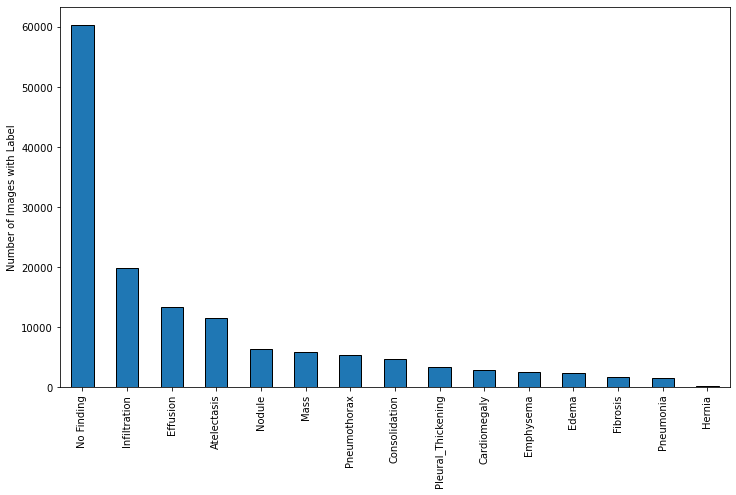

In [57]:
all_xray_df[all_labels].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Images with Label');

In [58]:
(all_xray_df[all_labels].sum()/len(all_xray_df)).sort_values(ascending=False)

No Finding            0.538361
Infiltration          0.177435
Effusion              0.118775
Atelectasis           0.103095
Nodule                0.056466
Mass                  0.051570
Pneumothorax          0.047289
Consolidation         0.041625
Pleural_Thickening    0.030191
Cardiomegaly          0.024759
Emphysema             0.022440
Edema                 0.020540
Fibrosis              0.015037
Pneumonia             0.012763
Hernia                0.002025
dtype: float64

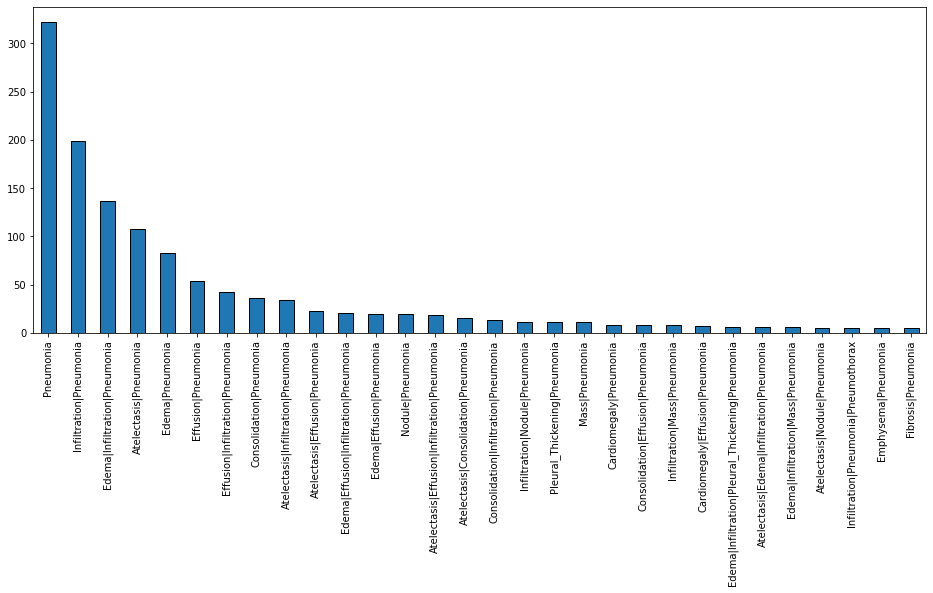

In [59]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar');

Text(0, 0.5, 'Number of Images with Label')

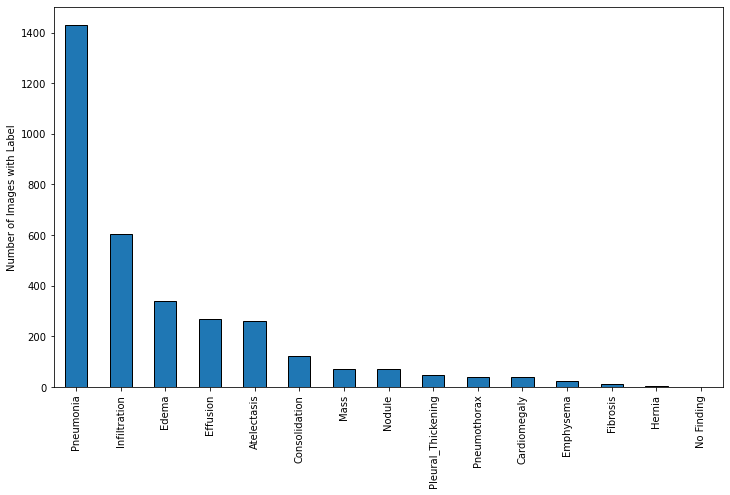

In [60]:
pneumonia[all_labels].sum().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Number of Images with Label')

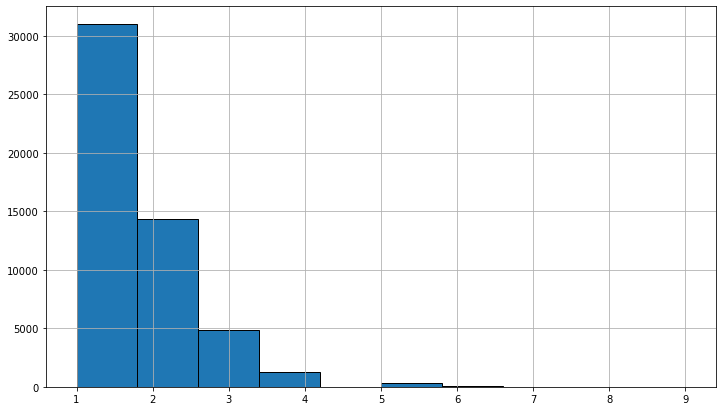

In [61]:
all_findings[all_labels].sum(axis=1).hist(bins=10)

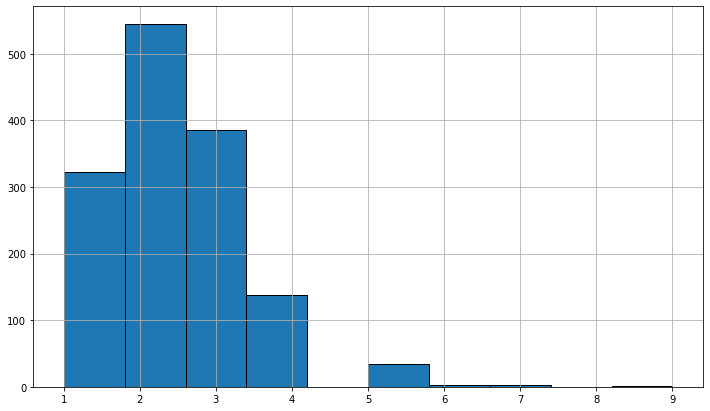

In [62]:
pneumonia[all_labels].sum(axis=1).hist(bins=10)

In the whole dataset, one finding is prevalent, whereas with pneumonia in most cases it is accompanied with one or two more findings.

## Pixel-Wise Analysis

In [63]:
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5073,00026963_026.png,Edema|Infiltration,26,26963,042Y,F,AP,3056,2544,0.139,0.139
4437,00021992_000.png,No Finding,0,21992,007Y,F,PA,2388,2216,0.139,0.139
2945,00014465_002.png,No Finding,2,14465,062Y,M,AP,2500,2048,0.168,0.168


In [64]:
for c_label in all_labels:
    if len(c_label)>1:
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda x: 1.0 if c_label in x else 0)

In [65]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
def get_path(row):
    fpath=None
    f = row['Image Index']
    for d in range(12):
        iname = 'images_'+str(d).zfill(3)
        fname = '/data/'+iname+'/images/'+f
        if os.path.isfile(fname):
            fpath=fname
            break
    return fpath

sample_df['image_path'] = sample_df.apply(get_path,axis=1)
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,image_path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,/data/images_001/images/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000017_001.png
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000030_001.png
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000032_001.png


In [67]:
pneumonia_samples = sample_df[sample_df['Pneumonia']==1]
len(pneumonia_samples)

62

In [68]:
!ls /data/

ARXIV_V5_CHESTXRAY.pdf	images_002  images_007	images_012
BBox_List_2017.csv	images_003  images_008	LOG_CHESTXRAY.pdf
Data_Entry_2017.csv	images_004  images_009	README_CHESTXRAY.pdf
FAQ_CHESTXRAY.pdf	images_005  images_010	test_list.txt
images_001		images_006  images_011	train_val_list.txt


In [69]:
def plot_img_dist(img_data):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.imshow(img_data,cmap='gray')
    ax1.title.set_text('Image')
    
    ax2.title.set_text('Intensity Distribution')
    ax2.hist(img_data.ravel(),bins=256)
    
    plt.plot()

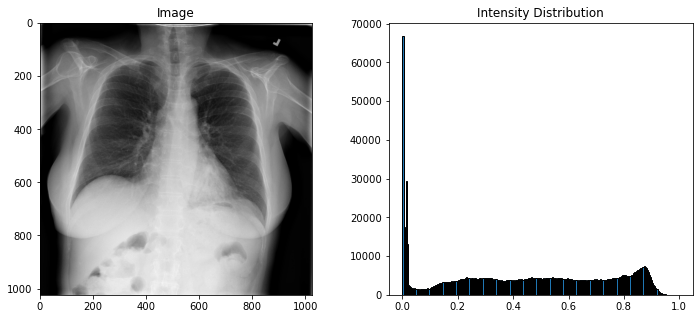

In [70]:
ex1_data = image.imread(pneumonia_samples['image_path'].iloc[1])
plot_img_dist(ex1_data)

In [71]:
# Adding image data - 
def get_image_data(row):
    fpath = row['image_path']
    if fpath is not None:
        img = image.imread(fpath)
        return img
    else:
        return None

In [72]:
pneumonia_samples['image_data'] = pneumonia_samples.apply(get_image_data,axis=1)
pneumonia_samples.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,image_path,image_data
256,00001373_010.png,Cardiomegaly|Effusion|Pneumonia,10,1373,058Y,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/data/images_002/images/00001373_010.png,"[[0.0, 0.003921569, 0.007843138, 0.007843138, ..."
287,00001529_004.png,Consolidation|Infiltration|Pneumonia,4,1529,054Y,F,PA,2992,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,/data/images_002/images/00001529_004.png,"[[0.91764706, 0.89411765, 0.8509804, 0.7960784..."
382,00001993_000.png,Infiltration|Nodule|Pneumonia,0,1993,011Y,F,PA,2048,2500,0.168,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,/data/images_002/images/00001993_000.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
723,00003789_000.png,Nodule|Pneumonia,0,3789,041Y,M,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,/data/images_002/images/00003789_000.png,"[[0.023529412, 0.039215688, 0.039215688, 0.039..."
775,00004074_000.png,Mass|Nodule|Pneumonia,0,4074,047Y,M,PA,2500,2048,0.171,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,/data/images_003/images/00004074_000.png,"[[0.8745098, 0.8, 0.7254902, 0.654902, 0.6, 0...."


In [73]:
pneump_data = pneumonia_samples[pneumonia_samples['image_data'].notna()]['image_data'].values
pneump_data.shape

(60,)

In [74]:
pneumonia_data = []
for data in pneump_data:
    pneumonia_data.extend(data.flatten().tolist())

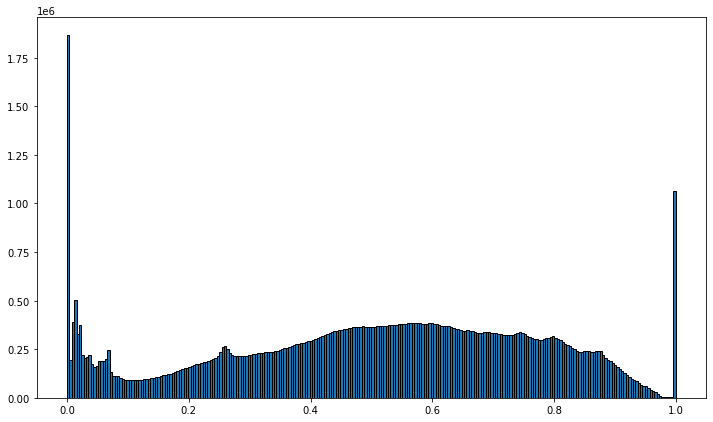

In [75]:
plt.hist(pneumonia_data,bins=256);

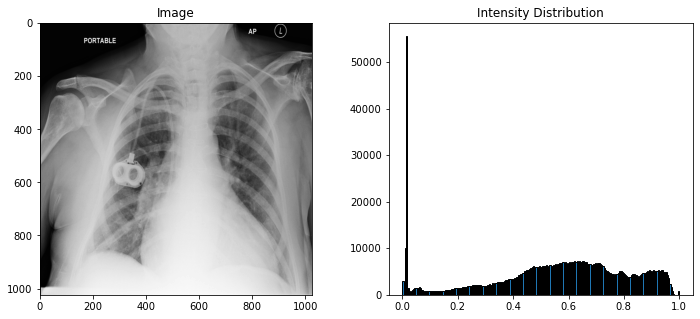

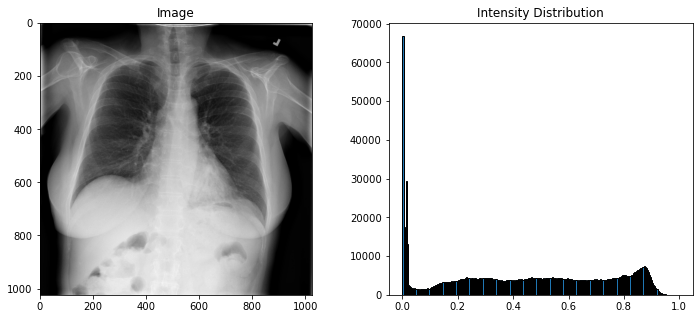

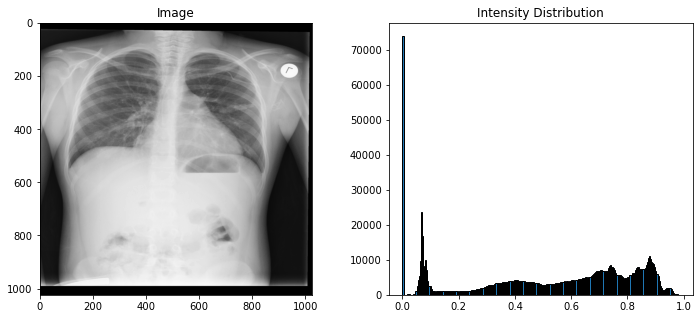

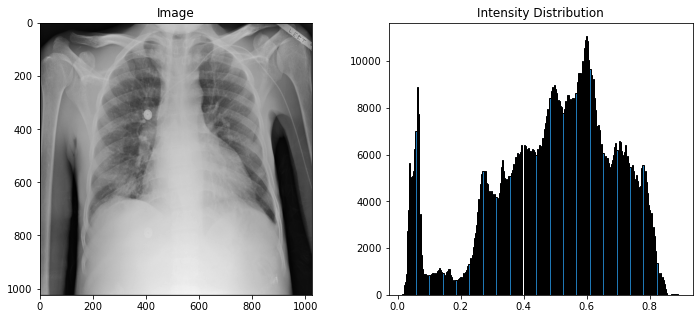

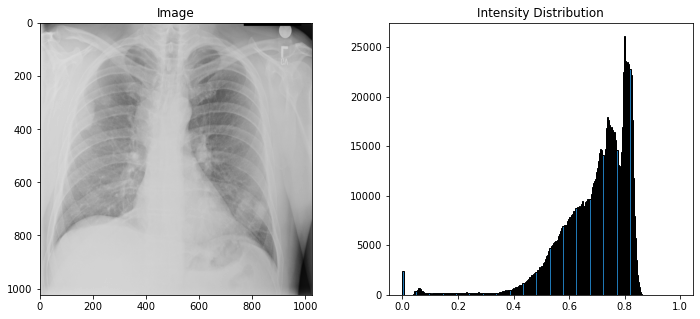

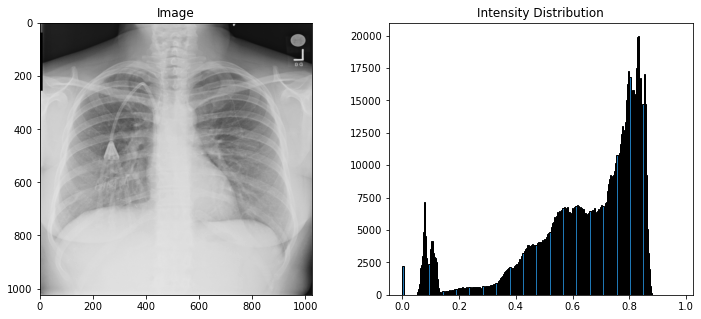

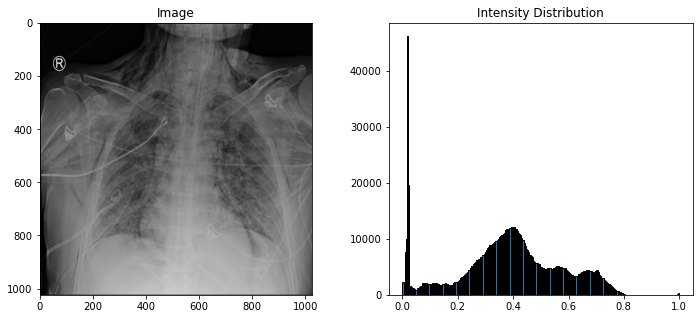

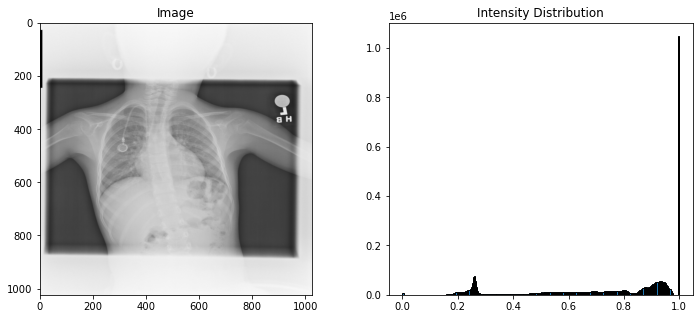

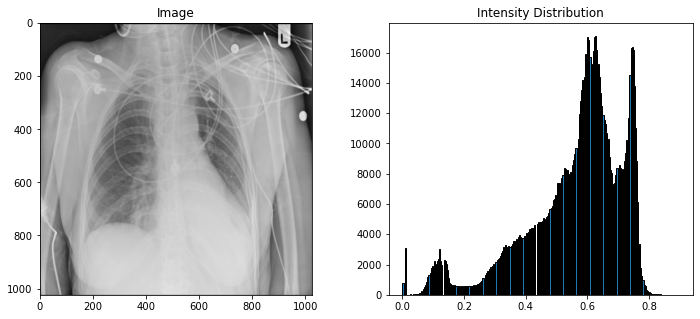

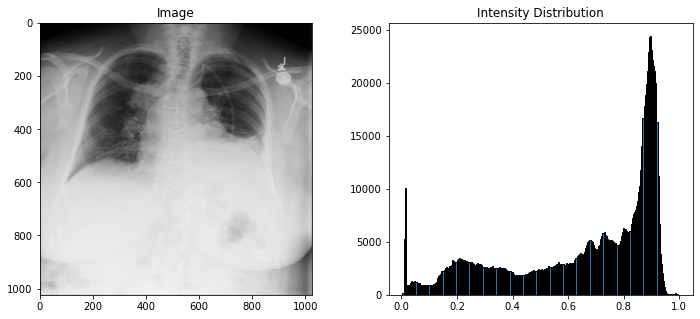

In [76]:
for data in pneump_data[:10]:
    plot_img_dist(data);

## Removing Background - 

In [87]:
def show_img_mask(img_data,th):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,4))
    mask = data>th
    
    ax1.set_title('Image')
    ax2.set_title('Mask')
    ax3.set_title('Intenstity Distribution')
    
    ax1.imshow(img_data,cmap='gray')
    ax2.imshow(mask.astype('int')*255,cmap='gray')
    ax3.hist(img_data[mask],bins=256)

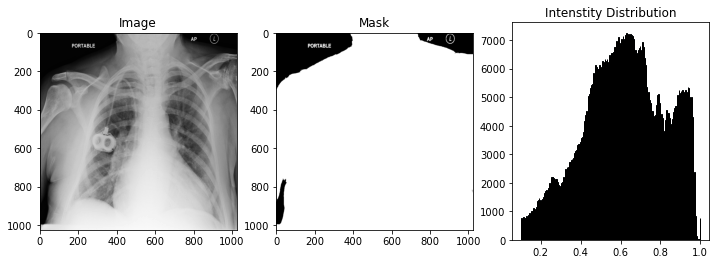

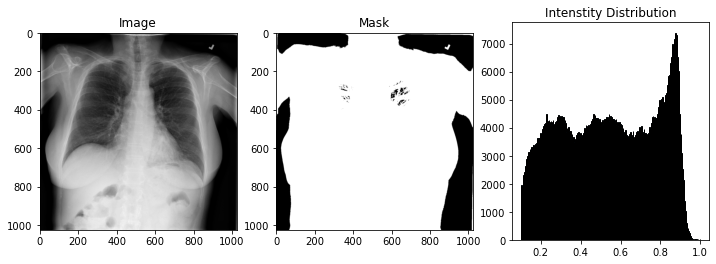

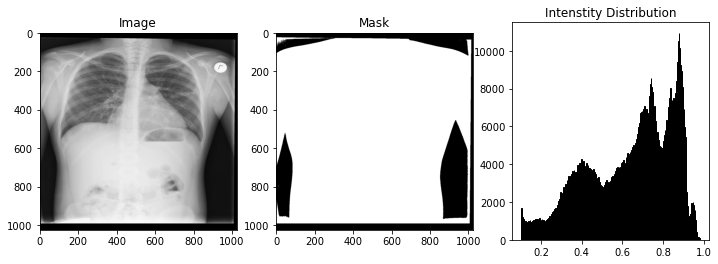

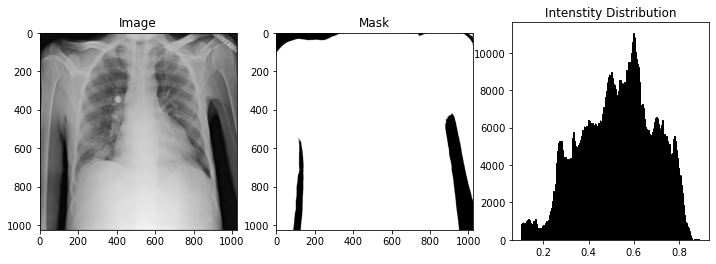

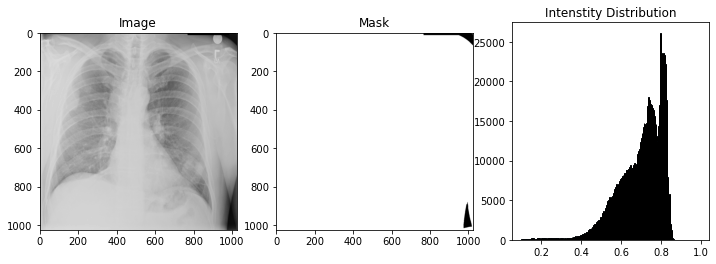

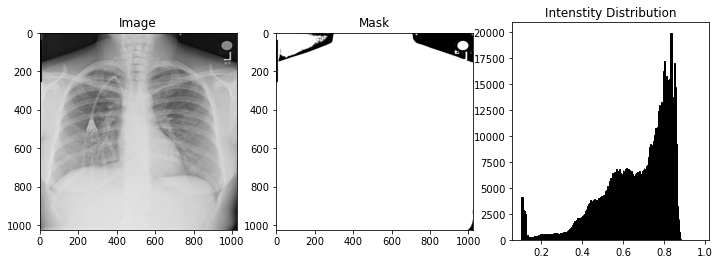

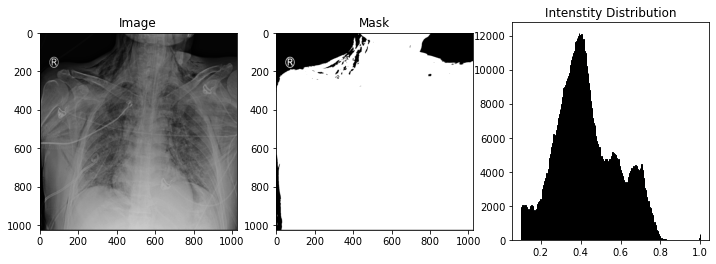

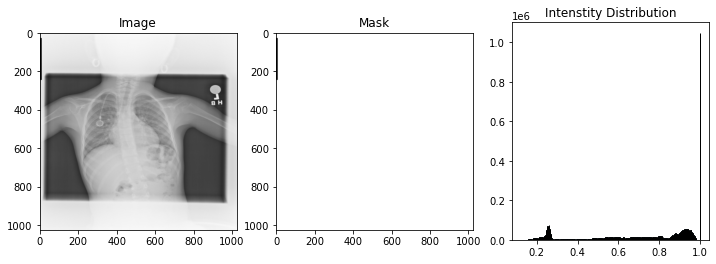

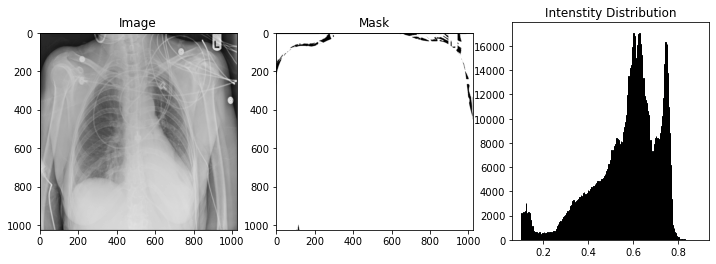

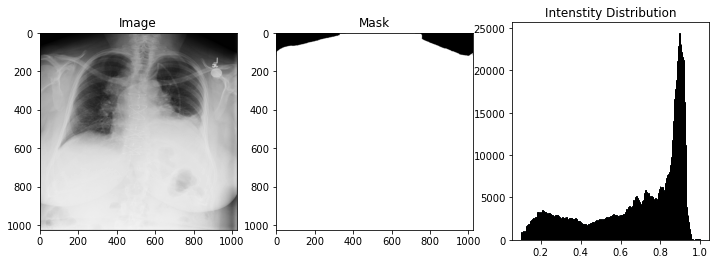

In [88]:
for data in pneump_data[:10]:
    show_img_mask(data,0.1)

In [91]:
## Removing foreground too for overall internsity distribution --- 

In [94]:
def get_intensities(label,max_samples,back_th,for_th):
    intensities = []
    data = sample_df[sample_df[label]==1].head(max_samples)['image_path'].values
    print(f'Label: {label}, number of samples for intensity distribution: {len(data)}')
    for img in data:
        dat = image.imread(img)
        mask = (dat>back_th)&(dat<for_th)
        intensities.extend(dat[mask].flatten().tolist())
        return intensities

Label: Pneumonia, number of samples for intensity distribution: 62


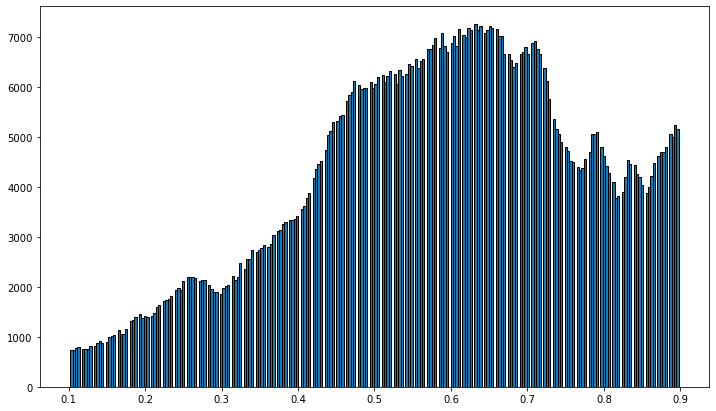

In [96]:
plt.hist(get_intensities('Pneumonia',1000,0.1,0.9),bins=256);

Label: Atelectasis, number of samples for intensity distribution: 508
Label: Cardiomegaly, number of samples for intensity distribution: 141
Label: Consolidation, number of samples for intensity distribution: 226
Label: Edema, number of samples for intensity distribution: 118
Label: Effusion, number of samples for intensity distribution: 644
Label: Emphysema, number of samples for intensity distribution: 127
Label: Fibrosis, number of samples for intensity distribution: 84
Label: Hernia, number of samples for intensity distribution: 13
Label: Infiltration, number of samples for intensity distribution: 967
Label: Mass, number of samples for intensity distribution: 284
Label: No Finding, number of samples for intensity distribution: 1000
Label: Nodule, number of samples for intensity distribution: 313
Label: Pleural_Thickening, number of samples for intensity distribution: 176
Label: Pneumonia, number of samples for intensity distribution: 62
Label: Pneumothorax, number of samples for in

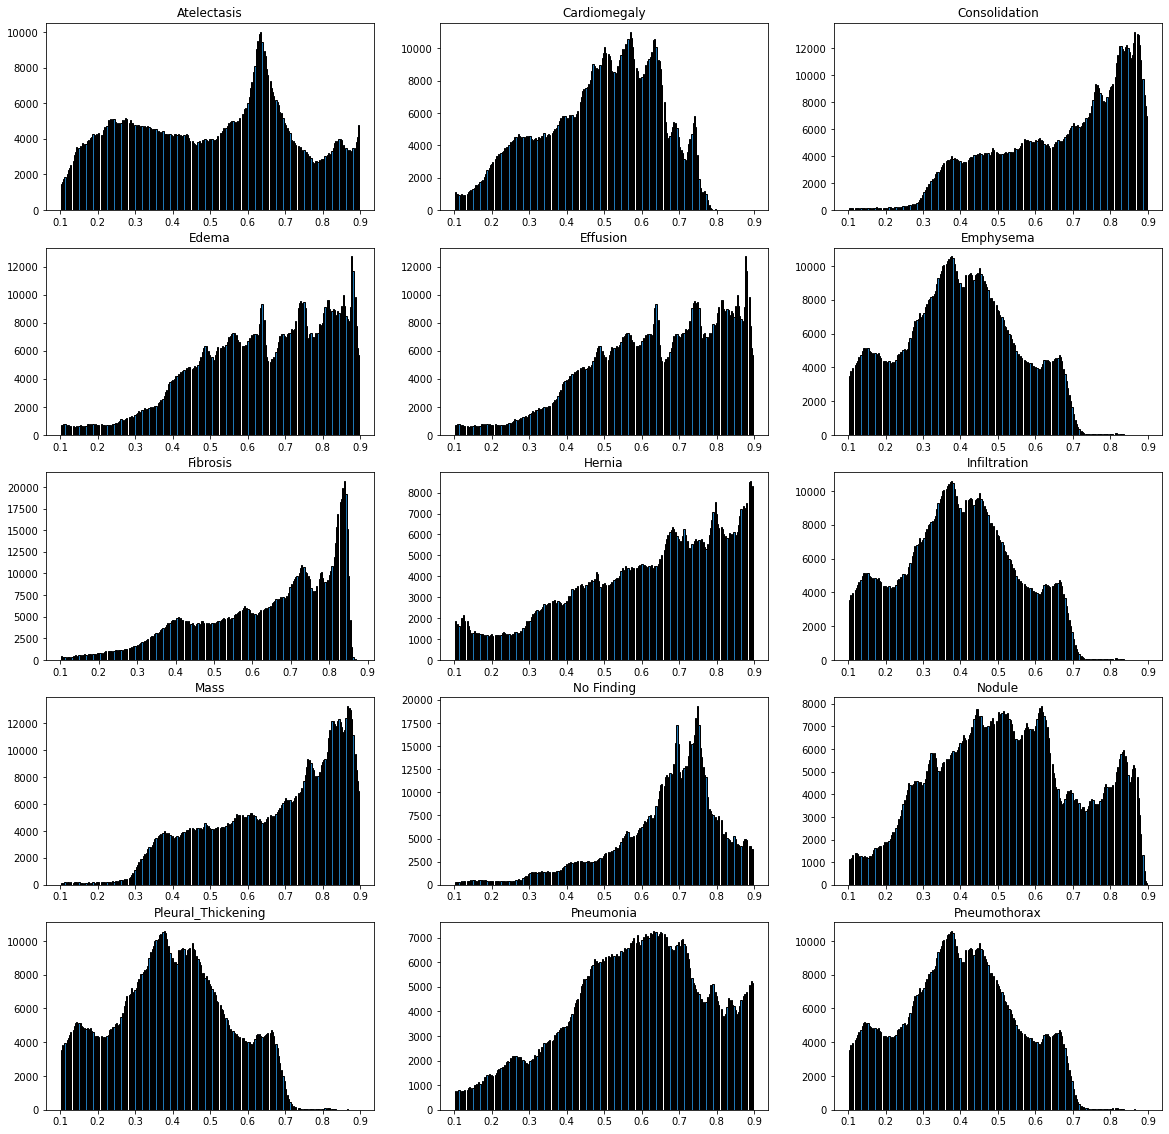

In [105]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

for i,finding in enumerate(all_labels):
    intensities = get_intensities(finding,1000,0.1,0.9)
    s = f.add_subplot(5,len(all_labels)/5,i+1)
    s.set_title(finding)
    plt.hist(intensities,bins=256)
    

### <b>Summary --</b> 
* Images are needed to be normalised in range from 0 to 1.0
* Background needed to be removed (suggested threshold - 0.1)
* Foreground needed to be removed too (suggested threshold - 0.9)
* 'Consolidation', 'Edema', 'Effusion', 'Hernia' have quite different from Pneumonia, but very similar to one    ?another distributions.
* Also, 'Emphysema', 'Pleural Thickening', 'Pneumothorax', 'Infitration' form another group that has distribution very similar to one another
